# pingme.pto.mami-project.eu results

This notebook tabulates cached results from https://pingme.pto.mami-project.eu, which is running the service at https://github.com/mami-project/pingme.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import os.path
import glob

from collections import namedtuple

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [2]:
def asn_for_address(addr):
    url = "https://stat.ripe.net/data/prefix-overview/data.json"
    
    res = requests.get(url, params={"resource": addr})
    
    if not res.ok:
        print("RIPEstat probe API request failed: "+repr(res.json()))
        return None
    
    try:
        api_content = json.loads(res.content.decode("utf-8"))
        api_as = api_content['data']['asns'][0]
        print("got AS {}".format(api_as))
        return api_as
    except Exception as e:
        print("couldn't process content:")
        print(json.dumps(api_content, indent=2))
        return None

In [3]:
PingSample = namedtuple("PingSample", ["time", "seq", "rtt"])

def gen_ping_samples(jo):
    try:
        for result in jo['results']:
            yield PingSample(result['at'], result['seq'], result['rtt'])
    except KeyError:
        pass

def pingme_cache_result(filename):
    with open(filename) as jf:
        jo = json.load(jf)

        # download AS information from stat.ripe.net
        asn = asn_for_address(jo['target'])
        
        # error means not pingable
        if "error" in jo:
            return {jo['target']: {'network': asn, 'data': None}}
        
        # now create a dataframe and cast it as appropriate
        df = pd.DataFrame(gen_ping_samples(jo))
        df['time'] = pd.to_datetime(df['time'], unit="s")
        df.index = df['time']
        del(df['time'])
        
        return {jo['target']: {'network': asn, 'data': df}}

In [4]:
results = {}

for filename in glob.glob("pingme_data/*.json"):
    try:
        result = pingme_cache_result(filename)
        results.update(result)
    except Exception as e:
        print("skipping {}: {}".format(filename, e))

got AS {'holder': 'AS20712 - Andrews & Arnold Ltd', 'asn': 20712}
got AS {'holder': 'ATT-INTERNET4 - AT&T Services', 'asn': 7018}
got AS {'holder': 'LGI-UPC - Liberty Global Operations B.V.', 'asn': 6830}
got AS {'holder': 'SWITCH', 'asn': 559}
got AS {'holder': 'SWISSCOM - Swisscom (Switzerland) Ltd', 'asn': 3303}
got AS {'holder': 'SWISSCOM - Swisscom (Switzerland) Ltd', 'asn': 3303}
got AS {'holder': 'VODAFONE-IT-ASN - Vodafone Italia S.p.A.', 'asn': 30722}
got AS {'holder': 'GLATTWERK - Glattwerk AG', 'asn': 61174}
got AS {'holder': 'ZAYO-6461 - Zayo Bandwidth', 'asn': 6461}
got AS {'holder': 'CMU-ROUTER - Carnegie Mellon University', 'asn': 9}
got AS {'holder': 'O2-ONLINE-AS - Telefonica UK Limited', 'asn': 29180}
got AS {'holder': 'SWITCH', 'asn': 559}
skipping pingme_data/38f3500d-f70f-4b26-904b-c056a4c0d8ab.json: 'target'
got AS {'holder': 'AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.', 'asn': 24560}
got AS {'holder': 'VERSATEL - 1&1 Versatel Deutschland GmbH', 'asn': 8881}
got AS 

In [5]:
targets = list(results.keys())

In [7]:
def plot_result(result):
    if result['data'] is None:
        print("{}: not pingable".format(result['network']))
    else:
        plt.figure(figsize=(10,6))
        plt.plot(result['data']['rtt'])
        plt.xlabel("RTT (ms)")
        plt.ylabel("time")
        plt.title("{} ({})".format(result['network']['asn'], result['network']['holder']))
        

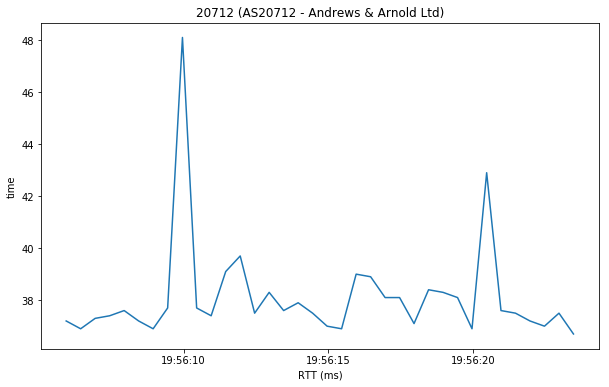

In [8]:
plot_result(results[targets[0]])

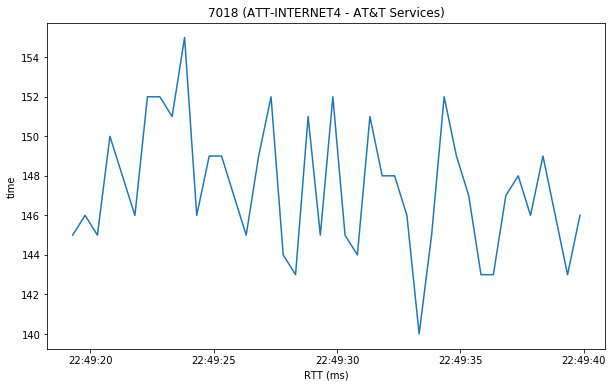

In [9]:
plot_result(results[targets[1]])

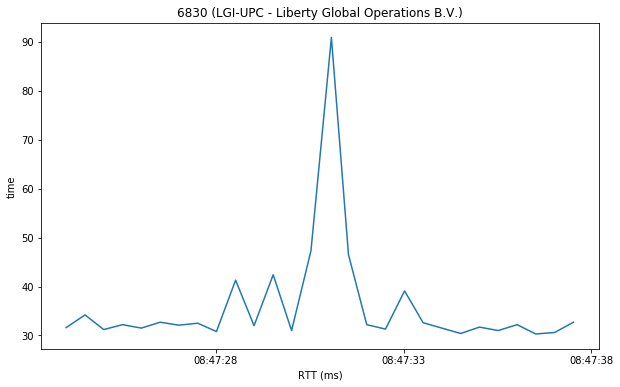

In [10]:
plot_result(results[targets[2]])

In [11]:
plot_result(results[targets[3]])

{'holder': 'SWITCH', 'asn': 559}: not pingable


In [12]:
plot_result(results[targets[4]])

{'holder': 'SWISSCOM - Swisscom (Switzerland) Ltd', 'asn': 3303}: not pingable


In [13]:
plot_result(results[targets[5]])

{'holder': 'SWISSCOM - Swisscom (Switzerland) Ltd', 'asn': 3303}: not pingable


In [14]:
plot_result(results[targets[6]])

{'holder': 'VODAFONE-IT-ASN - Vodafone Italia S.p.A.', 'asn': 30722}: not pingable


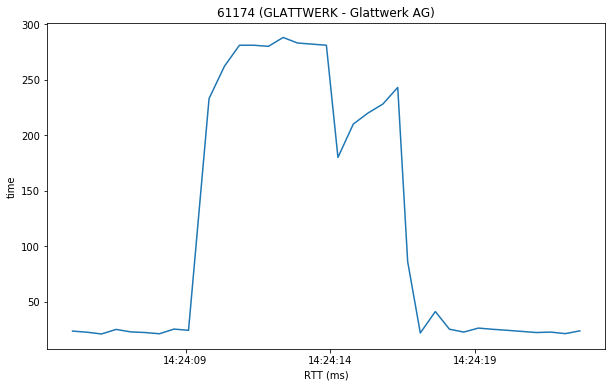

In [15]:
plot_result(results[targets[7]])

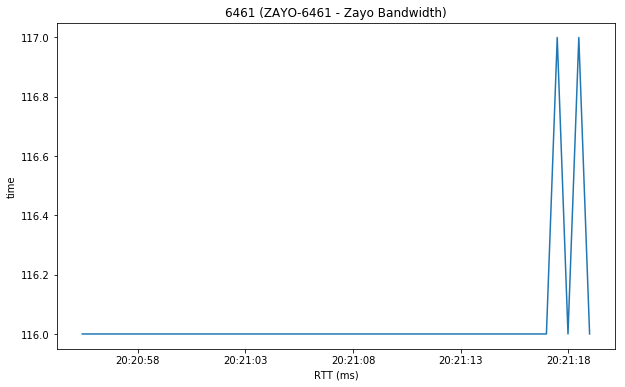

In [16]:
plot_result(results[targets[8]])

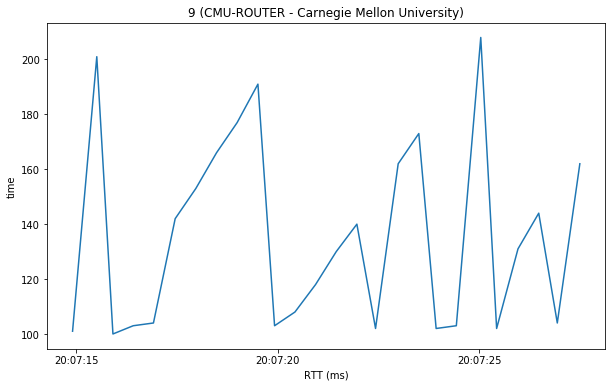

In [17]:
plot_result(results[targets[9]])

In [18]:
plot_result(results[targets[10]])

{'holder': 'O2-ONLINE-AS - Telefonica UK Limited', 'asn': 29180}: not pingable


In [19]:
plot_result(results[targets[11]])

{'holder': 'SWITCH', 'asn': 559}: not pingable


In [20]:
plot_result(results[targets[12]])

{'holder': 'AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.', 'asn': 24560}: not pingable


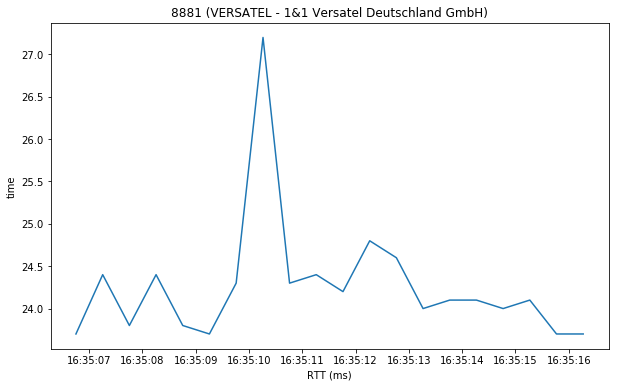

In [21]:
plot_result(results[targets[13]])

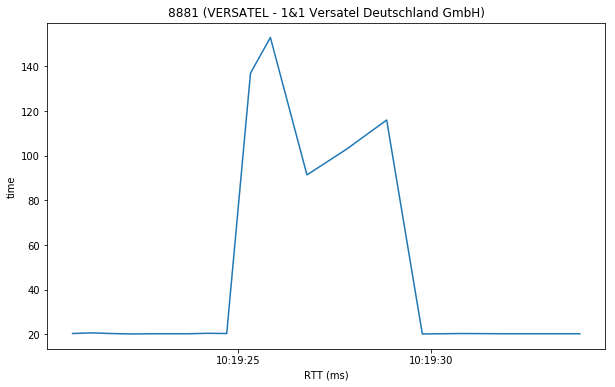

In [22]:
plot_result(results[targets[14]])

In [23]:
plot_result(results[targets[15]])

{'holder': 'LYNET-INTERNETT-AS - Lynet Internett AS', 'asn': 57963}: not pingable


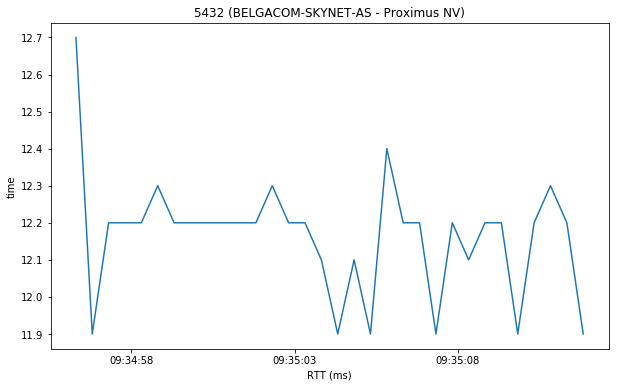

In [24]:
plot_result(results[targets[16]])

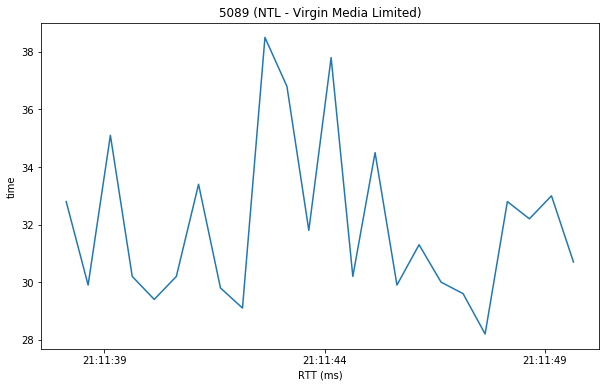

In [25]:
plot_result(results[targets[17]])

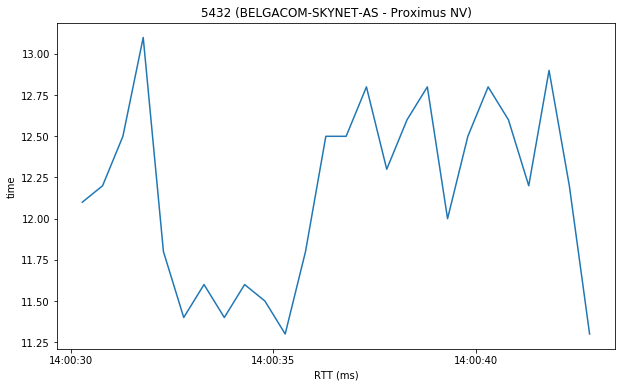

In [26]:
plot_result(results[targets[18]])

In [27]:
plot_result(results[targets[19]])

{'holder': 'TPG-INTERNET-AP TPG Telecom Limited', 'asn': 7545}: not pingable


In [28]:
plot_result(results[targets[20]])

{'holder': 'BELNET', 'asn': 2611}: not pingable


In [29]:
plot_result(results[targets[21]])

{'holder': 'SALT-CH - Salt Mobile SA', 'asn': 15796}: not pingable


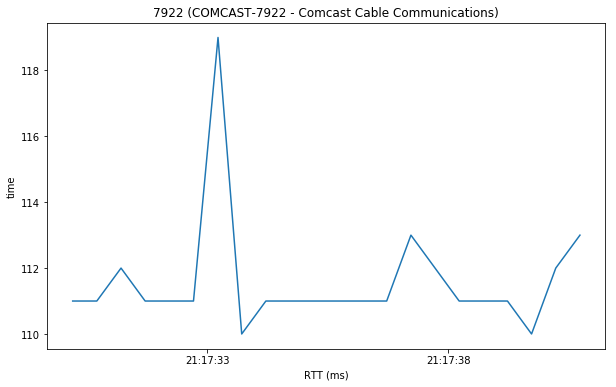

In [30]:
plot_result(results[targets[22]])

In [31]:
plot_result(results[targets[23]])

{'holder': 'AS3215 - Orange S.A.', 'asn': 3215}: not pingable


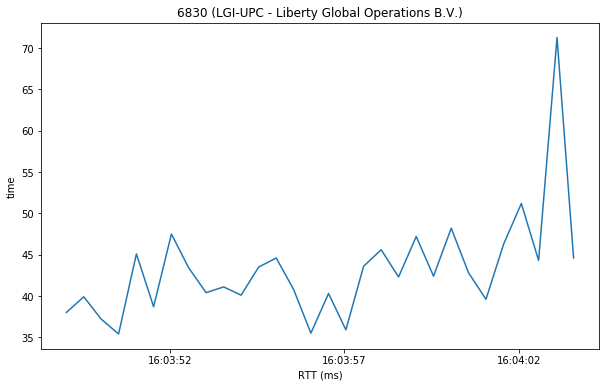

In [32]:
plot_result(results[targets[24]])

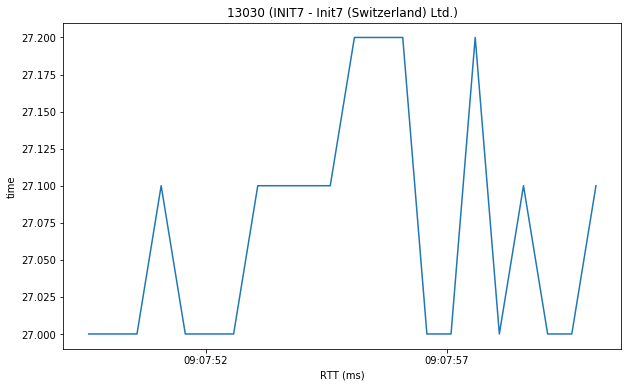

In [33]:
plot_result(results[targets[25]])

In [34]:
plot_result(results[targets[26]])

{'holder': 'SWITCH', 'asn': 559}: not pingable


In [35]:
plot_result(results[targets[27]])

{'holder': 'RIPE-NCC-AS - Reseaux IP Europeens Network Coordination Centre (RIPE NCC)', 'asn': 3333}: not pingable


In [36]:
plot_result(results[targets[28]])

{'holder': 'SWIPNET - TELE2', 'asn': 1257}: not pingable


In [37]:
plot_result(results[targets[29]])

{'holder': 'COMCAST-7922 - Comcast Cable Communications', 'asn': 7922}: not pingable


In [38]:
plot_result(results[targets[30]])

{'holder': 'DTAG - Deutsche Telekom AG', 'asn': 3320}: not pingable


In [39]:
plot_result(results[targets[31]])

{'holder': 'SWITCH', 'asn': 559}: not pingable


In [40]:
plot_result(results[targets[32]])

{'holder': 'CITYNET-AT-AS - Stadtwerke Hall in Tirol GmbH', 'asn': 34347}: not pingable


In [41]:
plot_result(results[targets[33]])

{'holder': 'SWISSCOM - Swisscom (Switzerland) Ltd', 'asn': 3303}: not pingable


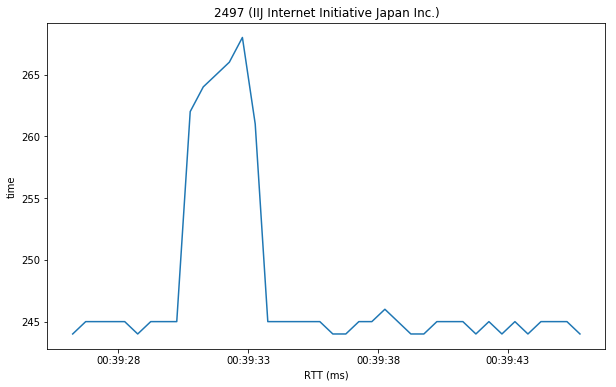

In [42]:
plot_result(results[targets[34]])

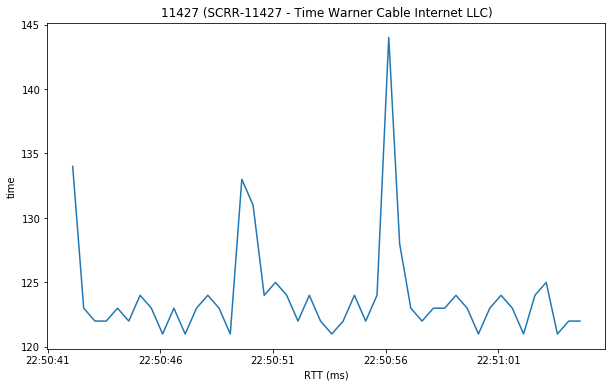

In [43]:
plot_result(results[targets[35]])

In [44]:
plot_result(results[targets[36]])

{'holder': 'VODAFONE_UK_ASN - Vodafone Limited', 'asn': 25135}: not pingable


In [45]:
plot_result(results[targets[37]])

{'holder': 'AS3215 - Orange S.A.', 'asn': 3215}: not pingable


In [46]:
plot_result(results[targets[38]])

{'holder': 'LGI-UPC - Liberty Global Operations B.V.', 'asn': 6830}: not pingable


In [47]:
plot_result(results[targets[39]])

{'holder': 'LEU-AS - Leunet AG', 'asn': 25375}: not pingable
